In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Active Case Data by County.xlsx",header=2)

In [3]:
a = df_Texas_Covid_case.set_index('County')

In [4]:
a.index

Index(['Anderson', 'Andrews', 'Angelina', 'Aransas', 'Archer', 'Armstrong',
       'Atascosa', 'Austin', 'Bailey', 'Bandera',
       ...
       'Willacy', 'Williamson', 'Wilson', 'Winkler', 'Wise', 'Wood', 'Yoakum',
       'Young', 'Zapata', 'Zavala'],
      dtype='object', name='County', length=254)

In [5]:
b = a.sum(axis=0)

In [6]:
dated_dict = {}
count = 0
for x in b:
    month_temp = int(b.index[count].split('\n')[2].split('-')[0])
    day_temp = int(b.index[count].split('\n')[2].split('-')[1])
    dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1

In [7]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Active Cases'])

In [8]:
c = dated_df.set_index('Date')

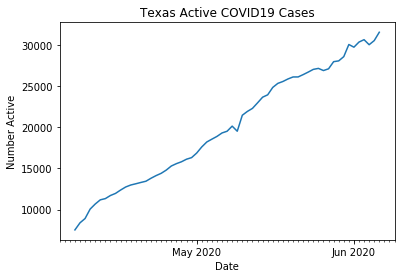

In [9]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Number Active',color='black')
plt.plot(c)
plt.title('Texas Active COVID19 Cases')
plt.savefig('TexasActive.png')